In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [5]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.0,27.0,31.0,NaN
1,85.0,64.0,NaN,NaN,23.0,0.0
2,86.0,54.0,33.0,16.0,54.0,0.0
3,NaN,78.0,34.0,24.0,36.0,0.0
4,98.0,55.0,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22.0,35.0,4.0
341,89.0,48.0,32.0,22.0,14.0,4.0
342,85.0,52.0,22.0,23.0,34.0,4.0
343,95.0,93.0,21.0,27.0,47.0,6.0


In [6]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	45
float64		column 2	34
float64		column 3	33
float64		column 4	22
float64		column 5	33
float64		column 6	34


In [7]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,300.000000,311.000000,312.000000,323.000000,312.000000,311.000000
mean,90.196667,70.048232,29.717949,24.018576,37.509615,3.355305
std,4.052910,17.936112,17.308918,8.805681,37.402390,3.196767
min,78.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.750000,58.000000,20.000000,19.000000,16.000000,0.500000
50%,90.000000,67.000000,26.000000,22.000000,26.000000,3.000000
75%,92.000000,80.000000,34.000000,27.000000,44.500000,5.000000
max,103.000000,138.000000,155.000000,78.000000,297.000000,20.000000


<AxesSubplot:>

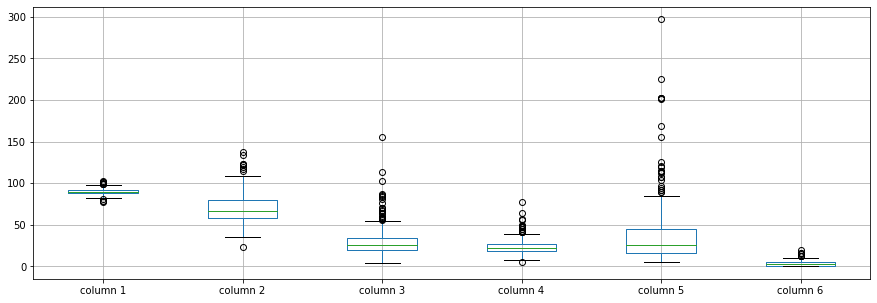

In [8]:
df.boxplot(return_type='axes', figsize=(15,5))

In [9]:

df.mean()

column 1    90.196667
column 2    70.048232
column 3    29.717949
column 4    24.018576
column 5    37.509615
column 6     3.355305
dtype: float64

In [10]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.010042,0.078250,0.145981,0.187446,0.244502
column 2,0.010042,1.000000,0.093481,0.177921,0.127959,0.140792
column 3,0.078250,0.093481,1.000000,0.651182,0.433386,0.237796
column 4,0.145981,0.177921,0.651182,1.000000,0.500927,0.326877
column 5,0.187446,0.127959,0.433386,0.500927,1.000000,0.356954
column 6,0.244502,0.140792,0.237796,0.326877,0.356954,1.000000


In [11]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [12]:
imputer = md.Midas(layer_structure = [6,6+30,6+30+30,6+30+30+30,6+30+30+30+30,6+30+30+30,6+30+30,6+30,6], vae_layer = False, seed = 300)
imputer.build_model(df)
imputer.train_model(training_epochs=30)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 248.1432872953869
Epoch: 1 , loss: 247.40111214773995
Epoch: 2 , loss: 246.82743254162017
Epoch: 3 , loss: 243.81098429361978
Epoch: 4 , loss: 248.0760970342727
Epoch: 5 , loss: 245.44319806780135
Epoch: 6 , loss: 245.03743707566034
Epoch: 7 , loss: 245.92201378231957
Epoch: 8 , loss: 247.02901931036087
Epoch: 9 , loss: 248.1374773297991
Epoch: 10 , loss: 248.50235058012464
Epoch: 11 , loss: 246.54522341773622
Epoch: 12 , loss: 248.19809904552642
Epoch: 13 , loss: 248.09307643345423
Epoch: 14 , loss: 245.89083426339286
Epoch: 15 , loss: 247.13871038527716
Epoch: 16 , loss: 246.41391790480841
Epoch: 17 , loss: 246.78897966657365
Epoch: 18 , loss: 246.54966009230841
Epoch: 19 , loss: 247.70507303873697
Epoch: 20 , loss: 247.36879548572358
Epoch: 21 , loss: 246.31354413713728
Epoch: 22 , loss: 246.99197533017113
Epoch: 23 , loss: 244.9544881184896
Epoch: 24 , loss: 247.9117162795294
Epoch: 25 , loss: 246.9

In [13]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [14]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.000000
column 2    47.000000
column 3     0.035473
column 4    15.000000
column 5    18.000000
column 6     0.500000
Name: 21, dtype: float64

In [15]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [16]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.000000,0.0,0.000000,0.000000,0.0,0.038366
1,0.000000,0.0,-58.959501,-31.966388,0.0,0.000000
2,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,-90.969879,0.0,0.000000,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...
340,0.000000,0.0,0.000000,0.000000,0.0,0.000000
341,0.000000,0.0,0.000000,0.000000,0.0,0.000000
342,0.000000,0.0,0.000000,0.000000,0.0,0.000000
343,0.000000,0.0,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [17]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [18]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [19]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

903.582886713777

In [20]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [21]:
NRMS=numerator/denominator
NRMS


0.3585984921364221

In [22]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [23]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.000000,92.0,45.000000,27.000000,31.0,0.038366
1,85.000000,64.0,0.040499,0.033612,23.0,0.000000
2,86.000000,54.0,33.000000,16.000000,54.0,0.000000
3,0.030121,78.0,34.000000,24.000000,36.0,0.000000
4,98.000000,55.0,13.000000,17.000000,17.0,0.000000
...,...,...,...,...,...,...
340,91.000000,54.0,25.000000,22.000000,35.0,4.000000
341,89.000000,48.0,32.000000,22.000000,14.0,4.000000
342,85.000000,52.0,22.000000,23.000000,34.0,4.000000
343,95.000000,93.0,21.000000,27.000000,47.0,6.000000


In [24]:
imputations[-1].to_excel("Bupa_NN_10(imp).xlsx", index=False, header=False)